# **Introduction**

In [174]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression as Logreg
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [175]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [176]:
file_path = '/content/drive/MyDrive/AIAssingment/EarthQuake.csv'
data = pd.read_csv(file_path)

In [177]:
print("Datas are shown below:")
print(tabulate(data.head(5), headers="keys", tablefmt="fancy_grid"))

print("Dataset Columns:")
print(data.columns.tolist())

Datas are shown below:
╒════╤══════════════════════════════════════════╤═════════════╤══════════════════╤═══════╤═══════╤═════════╤═══════════╤═══════╤═══════╤═══════╤══════════╤═══════╤═══════════╤═════════╤════════════╤═════════════╤═══════════════════════╤═══════════════╤═══════════╕
│    │ Heading                                  │   magnitude │ date_time        │   cdi │   mmi │ alert   │   tsunami │   sig │ net   │   nst │     dmin │   gap │ magType   │   depth │   latitude │   longitude │ location              │ continent     │ country   │
╞════╪══════════════════════════════════════════╪═════════════╪══════════════════╪═══════╪═══════╪═════════╪═══════════╪═══════╪═══════╪═══════╪══════════╪═══════╪═══════════╪═════════╪════════════╪═════════════╪═══════════════════════╪═══════════════╪═══════════╡
│  0 │ M 6.5 - 42 km W of Sola, Vanuatu         │         6.5 │ 16-08-2023 12:47 │     7 │     4 │ green   │         0 │   657 │ us    │   114 │ 7.177    │  25   │ mww       │ 192.95

Droping out unnessaray columns:

In [178]:
columns_to_drop = ['continent', 'country', 'nst', 'date_time', 'location', 'net']
data = data.drop(columns=columns_to_drop)
print("Result after dropping the tables:")
print(tabulate(data.head(5), headers="keys", tablefmt="fancy_grid"))

Result after dropping the tables:
╒════╤══════════════════════════════════════════╤═════════════╤═══════╤═══════╤═════════╤═══════════╤═══════╤══════════╤═══════╤═══════════╤═════════╤════════════╤═════════════╕
│    │ Heading                                  │   magnitude │   cdi │   mmi │ alert   │   tsunami │   sig │     dmin │   gap │ magType   │   depth │   latitude │   longitude │
╞════╪══════════════════════════════════════════╪═════════════╪═══════╪═══════╪═════════╪═══════════╪═══════╪══════════╪═══════╪═══════════╪═════════╪════════════╪═════════════╡
│  0 │ M 6.5 - 42 km W of Sola, Vanuatu         │         6.5 │     7 │     4 │ green   │         0 │   657 │ 7.177    │  25   │ mww       │ 192.955 │   -13.8814 │    167.158  │
├────┼──────────────────────────────────────────┼─────────────┼───────┼───────┼─────────┼───────────┼───────┼──────────┼───────┼───────────┼─────────┼────────────┼─────────────┤
│  1 │ M 6.5 - 43 km S of Intipucá, El Salvador │         6.5 │     8 │     

In [179]:
data = data.dropna(how='all')
data.shape

(608, 13)

In [180]:
categorical_columns = ['alert', 'tsunami']
for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(data[col].value_counts())


Unique values in alert:
alert
green     407
yellow    123
orange     42
red        32
Name: count, dtype: int64

Unique values in tsunami:
tsunami
1.0    325
0.0    283
Name: count, dtype: int64


In [181]:
missing_values = data.isnull().sum()

print("Missing Values in Selected Columns:")
print("\n--------------------------------------")
print(missing_values)



Missing Values in Selected Columns:

--------------------------------------
Heading      0
magnitude    0
cdi          0
mmi          0
alert        4
tsunami      0
sig          0
dmin         0
gap          0
magType      0
depth        0
latitude     0
longitude    0
dtype: int64


Checking out the duplication of data

In [182]:
duplicate_rows = data[data.duplicated()]
print("\nDuplicated Rows:")
print(duplicate_rows)


Duplicated Rows:
Empty DataFrame
Columns: [Heading, magnitude, cdi, mmi, alert, tsunami, sig, dmin, gap, magType, depth, latitude, longitude]
Index: []


# Data Visualization

In [183]:

alert_mapping = {'green': 1, 'yellow': 2, 'red': 3, 'orange':3}
data['alert'] = data['alert'].map(alert_mapping)

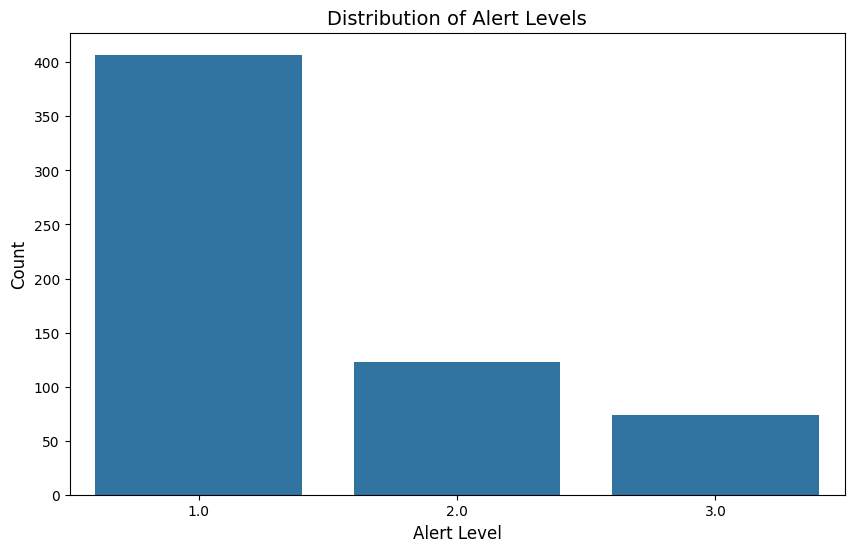

In [184]:
plt.figure(figsize=(10, 6))
sns.countplot(x='alert', data=data)

plt.title('Distribution of Alert Levels', fontsize=14)
plt.xlabel('Alert Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

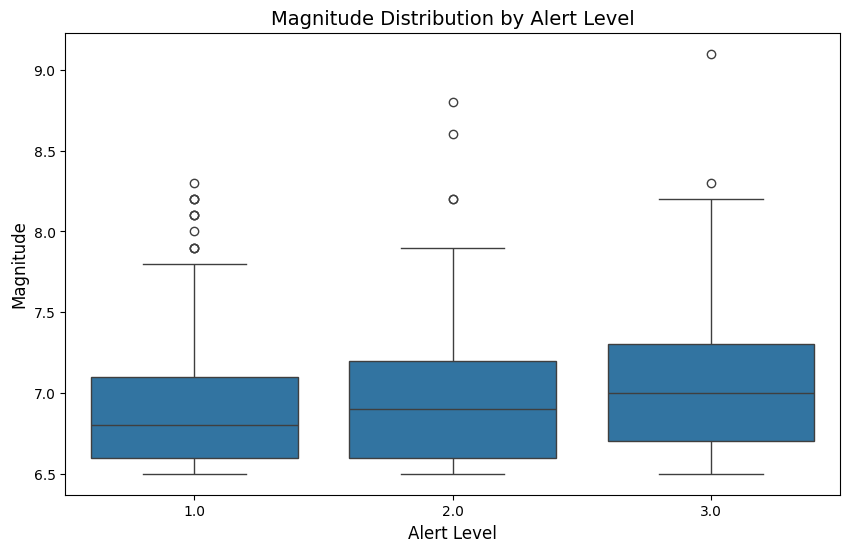

In [185]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='alert', y='magnitude', data=data)

plt.title('Magnitude Distribution by Alert Level', fontsize=14)
plt.xlabel('Alert Level', fontsize=12)
plt.ylabel('Magnitude', fontsize=12)

plt.show()

In [186]:
Q1 = data['depth'].quantile(0.25)
Q3 = data['depth'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data['depth'] = data['depth'].clip(lower=lower_bound, upper=upper_bound)

print(f"Original dataset size: {data.shape[0]}")
print(f"Dataset size after capping outliers: {data.shape[0]}")


Original dataset size: 608
Dataset size after capping outliers: 608


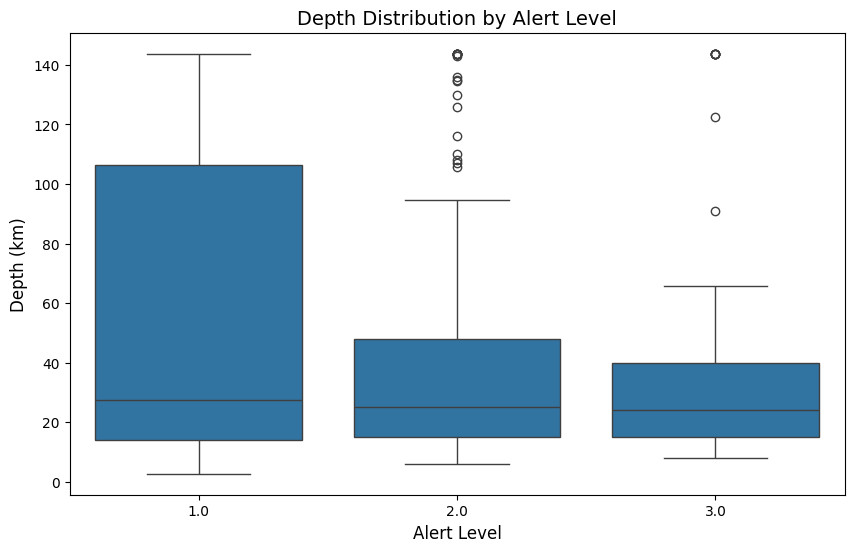

In [187]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='alert', y='depth', data=data)

plt.title('Depth Distribution by Alert Level', fontsize=14)
plt.xlabel('Alert Level', fontsize=12)
plt.ylabel('Depth (km)', fontsize=12)

plt.show()

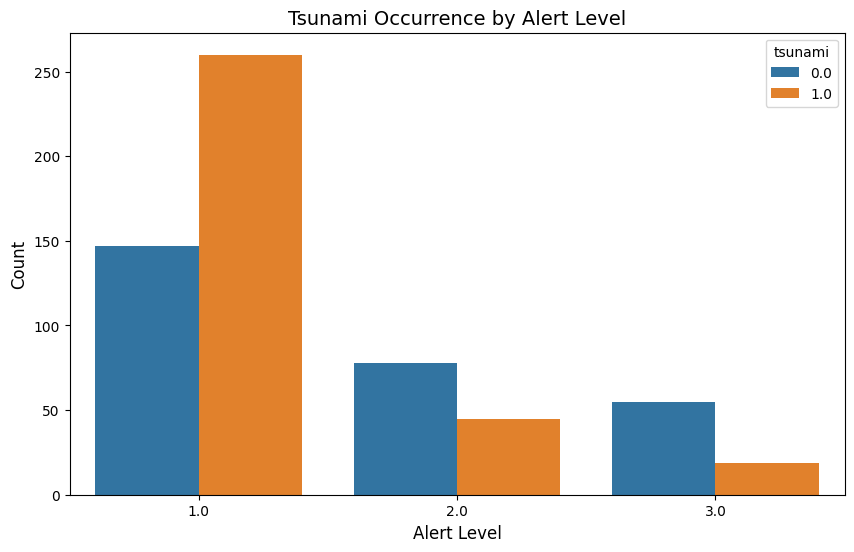

In [188]:
plt.figure(figsize=(10, 6))
sns.countplot(x='alert', hue='tsunami', data=data)

plt.title('Tsunami Occurrence by Alert Level', fontsize=14)
plt.xlabel('Alert Level', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

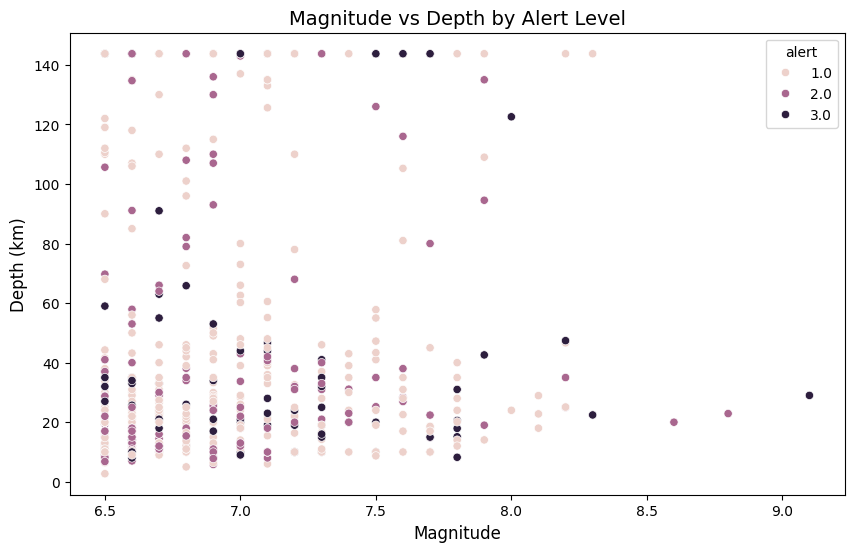

In [189]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='magnitude', y='depth', hue='alert',data=data)

plt.title('Magnitude vs Depth by Alert Level', fontsize=14)
plt.xlabel('Magnitude', fontsize=12)
plt.ylabel('Depth (km)', fontsize=12)

plt.show()

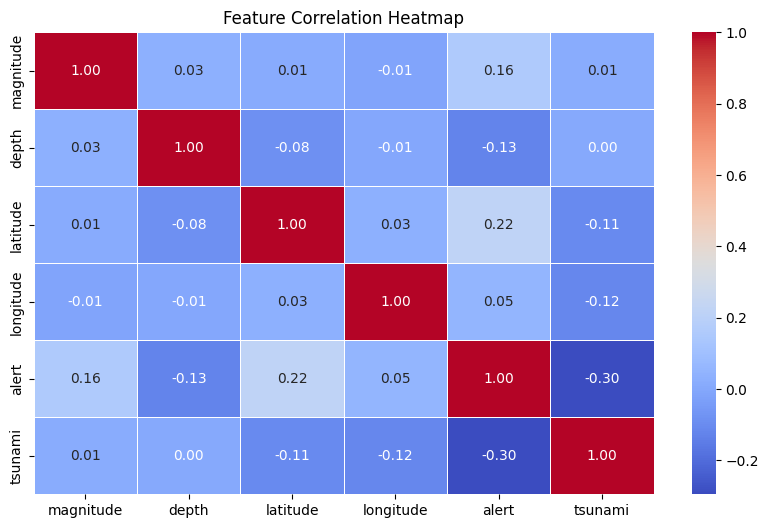

In [190]:
plt.figure(figsize=(10, 6))
sns.heatmap(data[["magnitude", "depth", "latitude", "longitude", "alert", "tsunami"]].corr(),
            annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

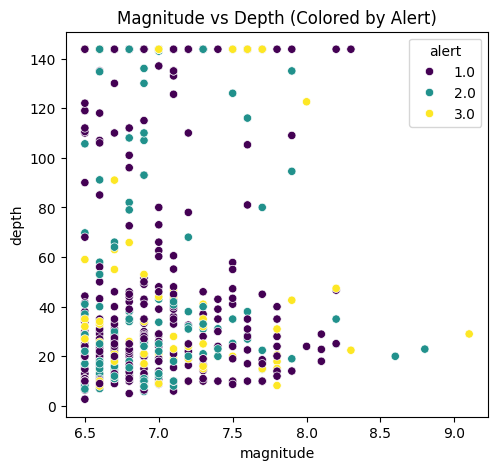

In [191]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x="magnitude", y="depth", hue="alert", data=data, palette="viridis")
plt.title("Magnitude vs Depth (Colored by Alert)")

plt.show()


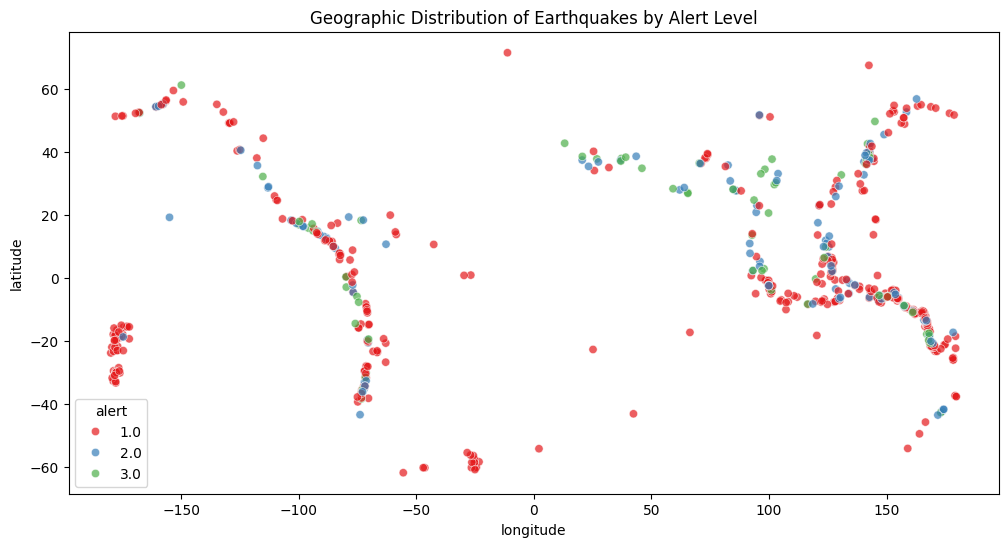

In [192]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x="longitude", y="latitude", hue="alert", data=data, palette="Set1", alpha=0.7)
plt.title("Geographic Distribution of Earthquakes by Alert Level")
plt.show()


**Task-1**

**Classification Task:**
---

# **Building the model from scratch**

In [193]:
label_encoder = LabelEncoder()
data['alert'] = label_encoder.fit_transform(data['alert'])

X = data[['magnitude', 'depth', 'latitude', 'longitude']]
y = data['alert']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [194]:
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        num_samples, num_features = X.shape

        self.weights = np.zeros(num_features)
        self.bias = 0

        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)

            dw = (1 / num_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / num_samples) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(linear_model)

        return (predictions >= 0.5).astype(int)


In [195]:
def evaluate_model(y_true, y_pred, dataset_name):
    print(f"\n{'_'*40}")
    print(f"Evaluation Metrics for {dataset_name} Set:")
    print(f"{'_'*40}")
    print(f"{'Accuracy:':<20} {accuracy_score(y_true, y_pred):.4f}")
    print(f"{'Precision:':<20} {precision_score(y_true, y_pred, average='weighted', zero_division=1):.4f}")
    print(f"{'Recall:':<20} {recall_score(y_true, y_pred, average='weighted', zero_division=1):.4f}")
    print(f"{'F1 Score:':<20} {f1_score(y_true, y_pred, average='weighted', zero_division=1):.4f}")
    print(f"{'='*40}\n")

evaluate_model(y_train, model.predict(X_train), "Train")
evaluate_model(y_test, model.predict(X_test), "Test")


________________________________________
Evaluation Metrics for Train Set:
________________________________________
Accuracy:            0.5761
Precision:           0.7156
Recall:              0.5761
F1 Score:            0.5627


________________________________________
Evaluation Metrics for Test Set:
________________________________________
Accuracy:            0.5410
Precision:           0.7478
Recall:              0.5410
F1 Score:            0.5689



# **Building the Primary Model:**

In [211]:
logreg_model = Logreg(max_iter=500)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

logreg_model.fit(X_train, y_train)
logreg_y_pred = logreg_model.predict(X_test)

rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

def evaluate_model(Y_test, y_pred, model_name):
    print(f"\n{'_'*40}")
    print(f"{model_name} Evaluation:")
    print(f"{'_'*40}")

    print(classification_report(Y_test, y_pred, zero_division=1))

evaluate_model(y_test, logreg_y_pred, "Logistic Regression")
evaluate_model(y_test, rf_y_pred, "Random Forest Classifier")

logreg_f1 = f1_score(y_test, logreg_y_pred, average='weighted', zero_division=1)
rf_f1 = f1_score(y_test, rf_y_pred, average='weighted', zero_division=1)


________________________________________
Logistic Regression Evaluation:
________________________________________
              precision    recall  f1-score   support

           0       0.75      0.98      0.85        91
           1       0.00      0.00      0.00        18
           2       1.00      0.00      0.00        13

    accuracy                           0.73       122
   macro avg       0.58      0.33      0.28       122
weighted avg       0.66      0.73      0.63       122


________________________________________
Random Forest Classifier Evaluation:
________________________________________
              precision    recall  f1-score   support

           0       0.81      0.92      0.86        91
           1       0.15      0.11      0.13        18
           2       0.40      0.15      0.22        13

    accuracy                           0.72       122
   macro avg       0.45      0.40      0.40       122
weighted avg       0.67      0.72      0.69       122



In [197]:
if logreg_f1 > rf_f1:
    print("\nLogistic Regression performed better on the test set.")
else:
    print("\nRandom Forest Classifier performed better on the test set.")



Random Forest Classifier performed better on the test set.


# Hyper-parameter Optimization with Cross-Validation

In [216]:
logreg_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 500, 1000]
}

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

logreg_grid_search = GridSearchCV(LogisticRegression(), logreg_param_grid, cv=3, n_jobs=-1, scoring='accuracy')
logreg_grid_search.fit(X_train, y_train)

rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=3, n_jobs=-1, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)

print("Best Logistic Regression Parameters:", logreg_grid_search.best_params_)
logreg_best_model = logreg_grid_search.best_estimator_

print("Best Random Forest Parameters:", rf_grid_search.best_params_)
rf_best_model = rf_grid_search.best_estimator_

logreg_y_pred_best = logreg_best_model.predict(X_test)
rf_y_pred_best = rf_best_model.predict(X_test)

def evaluate_model(Y_test, y_pred, model_name):
    print(f"\n{'_'*40}")
    print(f"{model_name} Evaluation:")
    print(f"{'_'*40}")
    print(classification_report(Y_test, y_pred, zero_division=1))

evaluate_model(y_test, logreg_y_pred_best, "Best Logistic Regression")
evaluate_model(y_test, rf_y_pred_best, "Best Random Forest Classifier")

Best Logistic Regression Parameters: {'C': 0.01, 'max_iter': 100, 'solver': 'saga'}
Best Random Forest Parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}

________________________________________
Best Logistic Regression Evaluation:
________________________________________
              precision    recall  f1-score   support

           0       0.75      1.00      0.85        91
           1       1.00      0.00      0.00        18
           2       1.00      0.00      0.00        13

    accuracy                           0.75       122
   macro avg       0.92      0.33      0.28       122
weighted avg       0.81      0.75      0.64       122


________________________________________
Best Random Forest Classifier Evaluation:
________________________________________
              precision    recall  f1-score   support

           0       0.81      0.97      0.88        91
           1       0.42      0.28      0.33        18
           

# Feature Selection

In [222]:
def forward_selection(X_train, y_train, X_test, y_test, model_type='logreg'):
    selected_features = []
    remaining_features = list(range(X_train.shape[1]))
    best_score = 0
    n_features = X_train.shape[1]

    while len(remaining_features) > 0:
        scores_with_candidates = []

        for feature in remaining_features:
            temp_features = selected_features + [feature]
            X_train_temp = X_train[:, temp_features]  # Use numpy slicing
            X_test_temp = X_test[:, temp_features]  # Use numpy slicing

            if model_type == 'logreg':
                model = LogisticRegression(max_iter=500, solver='liblinear')
            elif model_type == 'rf':
                model = RandomForestClassifier(n_estimators=100, random_state=42)

            model.fit(X_train_temp, y_train)
            y_pred = model.predict(X_test_temp)
            score = accuracy_score(y_test, y_pred)
            scores_with_candidates.append((score, feature))

        scores_with_candidates.sort(reverse=True)  # Sort by score
        best_score, best_feature = scores_with_candidates[0]

        selected_features.append(best_feature)
        remaining_features.remove(best_feature)

        print(f"Selected features: {selected_features}, Best Score: {best_score}")


        if len(scores_with_candidates) > 1 and best_score <= scores_with_candidates[1][0]:
            break

    return selected_features

logreg_selected_features = forward_selection(X_train, y_train, X_test, y_test, model_type='logreg')
print("\nSelected Features for Logistic Regression:", logreg_selected_features)

rf_selected_features = forward_selection(X_train, y_train, X_test, y_test, model_type='rf')
print("\nSelected Features for Random Forest:", rf_selected_features)

Selected features: [3], Best Score: 0.7459016393442623

Selected Features for Logistic Regression: [3]
Selected features: [0], Best Score: 0.7377049180327869
Selected features: [0, 1], Best Score: 0.6475409836065574
Selected features: [0, 1, 2], Best Score: 0.7213114754098361
Selected features: [0, 1, 2, 3], Best Score: 0.7213114754098361

Selected Features for Random Forest: [0, 1, 2, 3]


# Final Model

In [223]:
logreg_f1 = f1_score(y_test, logreg_y_pred_best, average='weighted', zero_division=1)
rf_f1 = f1_score(y_test, rf_y_pred_best, average='weighted', zero_division=1)

if logreg_f1 > rf_f1:
    best_model_type = 'logreg'
    best_model = LogisticRegression(**logreg_grid_search.best_params_, max_iter=500)
    best_features = logreg_selected_features
    print("\nLogistic Regression is the best model.")
else:
    best_model_type = 'rf'
    best_model = RandomForestClassifier(**rf_grid_search.best_params_, random_state=42)
    best_features = rf_selected_features
    print("\nRandom Forest is the best model.")

X_train_best = X_train[:, best_features]
X_test_best = X_test[:, best_features]

best_model.fit(X_train_best, y_train)
final_y_pred = best_model.predict(X_test_best)

print("\nFinal Model Evaluation:")
print(classification_report(y_test, final_y_pred, zero_division=1))

final_f1 = f1_score(y_test, final_y_pred, average='weighted', zero_division=1)

print(f"\nFinal Model F1-score: {final_f1:.4f}")
if final_f1 > max(logreg_f1, rf_f1):
    print(" The final model improved performance!")
else:
    print(" The final model did not improve performance.")



Random Forest is the best model.

Final Model Evaluation:
              precision    recall  f1-score   support

           0       0.81      0.97      0.88        91
           1       0.36      0.22      0.28        18
           2       1.00      0.15      0.27        13

    accuracy                           0.77       122
   macro avg       0.72      0.45      0.47       122
weighted avg       0.76      0.77      0.73       122


Final Model F1-score: 0.7255
 The final model did not improve performance.
